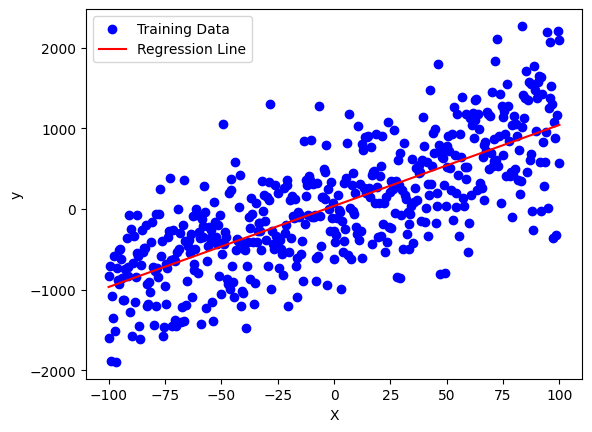

Intercept: 38.806274195377
Coefficient: 10.051217657661335


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
X = np.linspace(-100, 100, 500) # Input features (in this case, a single feature)
y = 10* X + 2 +500* np.random.normal(size=X.size) # Target variable and adding noise

# Add a column of ones to X for the bias term (intercept)
X_b = np.column_stack((np.ones((X.shape[0], 1)), X))

# Solve the normal equation to find the coefficients (theta)
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Predict values using the calculated coefficients
X_test = np.linspace(-100, 100, 500).reshape(-1, 1)
X_test_b = np.column_stack((np.ones((X_test.shape[0], 1)), X_test))
y_pred = X_test_b.dot(theta)

# Plot the original data points and the regression line
plt.scatter(X, y, label="Training Data", color="blue")
plt.plot(X_test, y_pred, label="Regression Line", color="red")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
# Print the calculated coefficients (intercept and slope)
print("Intercept:", theta[0])
print("Coefficient:", theta[1])


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.typing as npt

We consider a batch reactor hosting a reaction $ \nu_A A+ \nu_B B -> \nu_C C$. We assume the balances volume, i.e., the reactor volume, to be isothermal ($T$=const).

The volumetric reaction rate expression is thus $r_{R1}=k_1 c_A^{\nu_A} c_B^{\nu_B}$. The initial concentrations of components $A$ and $B$ are known a priori.

We are interested in determining the stoichiometric coefficients $\nu_A$ and $\nu_B$, as well as $k_1(T)=k_1$.

For this, we exploit the relation

$\frac{dc_C}{dt}|_{t=0}=r_{R1}=k_1 [c_A(0)]^{\nu_A} [c_B(0)]^{\nu_B}$.

We run experiments with known initial concentrations of $A$ and $B$, and measure the slope of $c_C(t=0)$ and thus obtain measurements of $r_{R1}$.

We first need to define a linear model by applying the base-10 logarithm such that

$log_{10}(r_{R1})= log_{10}(k_1)+ \nu_A \cdot  log_{10}(c_A(0))+\nu_B \cdot log_{10}(c_B(0))$.

We consider the inputs of out regression problem to be $\boldsymbol{x}=[log_{10}(c_A(0)), log_{10}(c_B(0))]$. The output is $y=r_{R1}$. The set of parameters is $\boldsymbol{\theta}=[log_{10}(k_1), \nu_A, \nu_B]$ such that we can derive

$y=\theta_0+\theta_1x_1+\theta_2x_2$.

In [18]:
def linear_regression(x_feature: npt.NDArray, y_target:npt.NDArray) -> npt.NDArray:

    # Add a column of ones to X for the bias term (intercept)
    X_b = np.column_stack((np.ones((x_feature.shape[0], 1)), x_feature))

    # Solve the normal equation to find the coefficients (theta)
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_target)

    return theta

In [35]:
x_feature = np.array([[-1,-0.699,-1,-0.699,-1.301,-0.699],
                     [-1,-1,-0.699,-0.699,-0.699,-1.301]]).T
y_target = np.array([-4.6096,-4.3157,-4.2999,-3.9988,-4.6224,-4.5818])

theta = linear_regression(x_feature, y_target)
print(f"k_1: {theta[0]}")
print('v_A: ', theta[1])
print('v_B: ', theta[2])

k_1: -2.601301727574798
v_A:  1.0239867109634533
v_B:  0.9805315614617935
